# CA6 - Question Answering using Bert, Albert

# Part 3 - ParsSquad Dataset 

Import libraries

In [1]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 45.4 MB/s 
     |████████████████████████████████| 596 kB 54.3 MB/s 
     |████████████████████████████████| 101 kB 9.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 5.1 MB/s 
     |████████████████████████████████| 140 kB 63.4 MB/s 
     |████████████████████████████████| 1.1 MB 65.1 MB/s 
     |████████████████████████████████| 212 kB 68.5 MB/s 
     |████████████████████████████████| 127 kB 72.1 MB/s 
     |████████████████████████████████| 271 kB 71.8 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |██████████████

In [2]:
import json
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/Sheyda/Data - QA/ParsQuad'

## Preprocessing Datasets

In [5]:
def json_to_dataframe(file):
    f = open ( file , "r") 
    data = json.loads(f.read())               #loading the json file.
    iid = []                                  
    tit = []                                  #Creating empty lists to store values.
    con = []
    Que = []
    ans = []
    
    for i in range(len(data['data'])):       #Root tag of the json file contains 'title' tag & 'paragraphs' list.
        for p in range(len(data['data'][i]['paragraphs'])):  # 'paragraphs' list contains 'context' tag & 'qas' list.
            context = data['data'][i]['paragraphs'][p]['context']
            for q in range(len(data['data'][i]['paragraphs'][p]['qas'])):  # 'qas' list contains 'question', 'Id' tag & 'answers' list.
                question = data['data'][i]['paragraphs'][p]['qas'][q]['question']
                Id = data['data'][i]['paragraphs'][p]['qas'][q]['id']
                answer_texts = [] 
                answer_starts = []
                for a in range(len(data['data'][i]['paragraphs'][p]['qas'][q]['answers'])): # 'answers' list contains 'ans_start', 'text' tags. 
                    answer_texts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['text'])
                    answer_starts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['answer_start'])
                    if len(answer_texts) == 0:
                      answer_texts.append('')
                      answer_starts.append(0)
                    con.append(context)
                    Que.append(question)                    # Appending values to lists
                    iid.append(Id)
                    ans.append({'text': answer_texts, 'answer_start': answer_starts })

    new_df = pd.DataFrame(columns=['id','context','question','answers']) # Creating empty DataFrame.
    new_df.id = iid
    new_df.context = con
    new_df.question = Que
    new_df.answers = ans

    return new_df

In [6]:
train_df = json_to_dataframe(os.path.join(data_path,'ParSQuAD-automatic-train.json'))

In [7]:
train_df.head()

,id,context,question,answers
0,56be85543aeaaa14008c9063,بیانسه جیزل نوولز-کارتر (/ biːˈjɒnseɪ / bee-YO...,از چه زمانی بیانسه شروع به محبوبیت کرد؟,"{'text': ['در اواخر دهه 1990'], 'answer_start'..."
1,56be85543aeaaa14008c9066,بیانسه جیزل نوولز-کارتر (/ biːˈjɒnseɪ / bee-YO...,چه موقع بیانسه Destiny's Child را ترک کرد و یک...,"{'text': ['2003'], 'answer_start': [476]}"
2,56bf6b0f3aeaaa14008c9602,بیانسه جیزل نوولز-کارتر (/ biːˈjɒnseɪ / bee-YO...,در چه دهه ای بیانسه مشهور شد؟,"{'text': ['اواخر دهه 1990'], 'answer_start': [..."
3,56bf6b0f3aeaaa14008c9605,بیانسه جیزل نوولز-کارتر (/ biːˈjɒnseɪ / bee-YO...,چه کسی گروه Destiny's Child را مدیریت می کرد؟,"{'text': ['ماتیو نولز'], 'answer_start': [323]}"
4,56d43c5f2ccc5a1400d830a9,بیانسه جیزل نوولز-کارتر (/ biːˈjɒnseɪ / bee-YO...,چه موقع بیانسه به شهرت رسید؟,"{'text': ['اواخر دهه 1990'], 'answer_start': [..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [8]:
test_df = json_to_dataframe(os.path.join(data_path,'ParSQuAD-automatic-dev.json'))
test_df.head()

,id,context,question,answers
0,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
1,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
2,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
3,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
4,56ddde6b9a695914005b9629,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نورمن ها چه زمانی در نرماندی بودند؟,"{'text': ['قرون 10 و 11', 'در قرون 10 و 11', '..."


In [9]:
val_df = json_to_dataframe(os.path.join(data_path,'ParSQuAD-automatic-dev.json'))
val_df.head()

,id,context,question,answers
0,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
1,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
2,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
3,56ddde6b9a695914005b9628,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نرماندی در کدام کشور واقع شده است؟,"{'text': ['فرانسه', 'فرانسه', 'فرانسه', 'فرانس..."
4,56ddde6b9a695914005b9629,نورمن ها (نورمن: Nourmands ؛ فرانسوی: Normands...,نورمن ها چه زمانی در نرماندی بودند؟,"{'text': ['قرون 10 و 11', 'در قرون 10 و 11', '..."


In [10]:
from datasets import Dataset
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

In [11]:
train_ds[1]

{'answers': {'answer_start': [476], 'text': ['2003']},
 'context': 'بیانسه جیزل نوولز-کارتر (/ biːˈjɒnseɪ / bee-YON-say) (متولد 4 سپتامبر 1981) خواننده ، ترانه سرا ، تهیه کننده ضبط و بازیگر آمریکایی است. وی در هوستون تگزاس متولد و بزرگ شد و در کودکی در مسابقات مختلف آواز و رقص شرکت کرد و در اواخر دهه 1990 به عنوان خواننده اصلی گروه دخترانه R&B Destiny\'s Child به شهرت رسید. با مدیریت پدرش ماتیو نولز ، این گروه به یکی از پرفروش ترین گروه های دختران جهان در تمام دوران تبدیل شد. وقفه آنها باعث انتشار اولین آلبوم بیانسه ، Dangerously in Love (2003) شد ، که او را به عنوان یک هنرمند انفرادی در سراسر جهان تثبیت کرد ، پنج جایزه گرمی را به دست آورد و تک آهنگ های شماره یک بی بیلبورد Hot "Crazy in Love" و "Baby Boy" را به نمایش گذاشت. .',
 'id': '56be85543aeaaa14008c9066',
 'question': "چه موقع بیانسه Destiny's Child را ترک کرد و یک خواننده انفرادی شد؟"}

In [12]:
train_ds

Dataset({
    features: ['id', 'context', 'question', 'answers'],
    num_rows: 43267
})

In [13]:
train_ds['answers'][0]

{'answer_start': [221], 'text': ['در اواخر دهه 1990']}

## Pars Bert config

In [14]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, AutoModelForQuestionAnswering
from transformers import TrainingArguments
import transformers

In [15]:
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModelForQuestionAnswering.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624M [00:00<?, ?B/s]

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initia

Max Length = 400

In [16]:
for i, example in enumerate(train_ds):
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > 318:
        break
example = train_ds[i]

In [17]:
example

{'answers': {'answer_start': [28], 'text': ['جی ز']},
 'context': 'در 4 آوریل 2008 ، بیانسه با جی ز ازدواج کرد. او ازدواج خود را در مونتاژ ویدیویی در مهمانی گوش دادن به سومین آلبوم استودیویی خود ، من هستم ... ساشا فیرس ، در 22 دسامبر 2008 در باشگاه سونی منهتن آشکار کرد. من هستم ... ساشا فیرس در 18 نوامبر 2008 در ایالات متحده آزاد شد. این آلبوم رسماً آلترایگو بیانسه را معرفی می کند ، ساشا فییرس ، که هنگام ساخت تک آهنگ "دیوانه عاشق" در سال 2003 تصور شد ، در هفته اول 482،000 نسخه فروش ، اولین نمایش در بالای بیلبورد 200 ، و سومین آلبوم شماره یک پی در پی به بیانسه در آمریکا این آلبوم شامل آهنگ شماره یک "Single Ladies (Put a Ring on It)" و پنج آهنگ برتر "If I Are A Boy" و "Halo" بود. موفقیت "Halo" در ایالات متحده با دستیابی به موفقیت در تبدیل شدن به طولانی ترین تک آهنگ داغ 100 خود در کارنامه خود ، به بیانسه کمک کرد تا در طول دهه 2000 بیش از هر زن دیگری در لیست 10 تک آهنگ برتر این لیست قرار گیرد. این فیلم همچنین شامل "رویاهای شیرین" و تک آهنگهای "Diva" ، "Ego" ، "Girl Broken-Hearted" و "Video

In [18]:
len(tokenizer(example["question"], example["context"])["input_ids"])

442

In [19]:
max_length = 400 # The maximum length of a feature (question and context)

In [20]:
def prepare_train_features(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )
  
    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        
        if answer['text'][0] == '':
           start_positions.append(0)
           end_positions.append(0)
           continue
        
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [22]:
tokenized_train = train_ds.map(prepare_train_features, batched=True, remove_columns=train_ds.column_names)

Parameter 'function'=<function prepare_train_features at 0x7fbf04eaa560> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/44 [00:00<?, ?ba/s]

In [23]:
tokenized_val = val_ds.map(prepare_train_features, batched=True, remove_columns=val_ds.column_names)

  0%|          | 0/9 [00:00<?, ?ba/s]

In [24]:
train_ds.column_names

['id', 'context', 'question', 'answers']

In [25]:
def preprocess_test_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        # stride=stride,
        # return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    # sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        # sample_idx = sample_map[i]
        # example_ids.append(examples["id"][i])
        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    # inputs["example_id"] = example_ids
    return inputs

In [26]:
dataset_test_preprocessed = test_ds.map(
    preprocess_test_examples,
    batched=True,
    remove_columns=['context', 'answers', 'question'],
)

  0%|          | 0/9 [00:00<?, ?ba/s]

In [27]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [28]:
from datasets import load_metric
metric = load_metric("squad")

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,

)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 43267
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 16227


Epoch,Training Loss,Validation Loss
1,1.395700,1.723292
2,0.870600,1.840423


***** Running Evaluation *****
  Num examples = 8742
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-5409
Configuration saved in bert-finetuned-squad/checkpoint-5409/config.json
Model weights saved in bert-finetuned-squad/checkpoint-5409/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-5409/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-5409/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 8742
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-10818
Configuration saved in bert-finetuned-squad/checkpoint-10818/config.json
Model weights saved in bert-finetuned-squad/checkpoint-10818/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-10818/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-10818/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 8742
  Batch size =

In [35]:
trainer.save_model("test-squad-trained")

Saving model checkpoint to test-squad-trained
Configuration saved in test-squad-trained/config.json
Model weights saved in test-squad-trained/pytorch_model.bin
tokenizer config file saved in test-squad-trained/tokenizer_config.json
Special tokens file saved in test-squad-trained/special_tokens_map.json


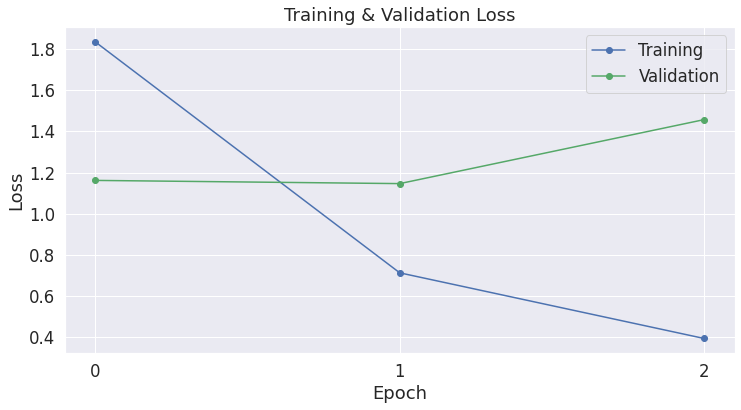

In [29]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.834100, 0.713400,0.394800	], 'b-o', label="Training")
plt.plot([1.162066, 1.146545, 1.457134], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()


In [37]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


The following columns in the test set don't have a corresponding argument in `BertForQuestionAnswering.forward` and have been ignored: id, offset_mapping. If id, offset_mapping are not expected by `BertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 8742
  Batch size = 8


In [38]:
b

{'test_runtime': 131.3329,
 'test_samples_per_second': 66.564,
 'test_steps_per_second': 8.322}

In [30]:
from tqdm.auto import tqdm

import collections

import numpy as np

n_best = 1000
max_answer_length = 50


def compute_metrics(start_logits, end_logits, features, examples):
    # example_to_features = collections.defaultdict(list)
    # for idx, feature in enumerate(features):
        # example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for i, example in enumerate(examples):
        example_id = example["id"]
        context = example["context"]
        answers = []
        start_logit = start_logits[i]
        end_logit = end_logits[i]
        offsets = features[i]["offset_mapping"]
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        for start_index in start_indexes:
            for end_index in end_indexes:
                # Skip answers that are not fully in the context
                if offsets[start_index] is None or offsets[end_index] is None:
                    continue
                # Skip answers with a length that is either < 0 or > max_answer_length
                if (
                    end_index < start_index
                    or end_index - start_index + 1 > max_answer_length
                ):
                    continue

                answer = {
                    "text": context[offsets[start_index][0] : offsets[end_index][1]],
                    "logit_score": start_logit[start_index] + end_logit[end_index],
                }
                answers.append(answer)

        # Loop through all features associated with that example
        # for feature_index in example_to_features[example_id]:
            # start_logit = start_logits[feature_index]
            # end_logit = end_logits[feature_index]
            # offsets = features[feature_index]["offset_mapping"]

            
        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    theoretical_answers = [{"id": ex["id"], "answers": ex["answers"]} for ex in examples]
    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

In [40]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


{'exact_match': 67.43308167467399, 'f1': 76.29179298599591}

## Albert Config

In [21]:
config = AutoConfig.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")
model = AutoModelForQuestionAnswering.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/837k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/186 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at HooshvareLab/albert-fa-zwnj-base-v2 were not used when initializing AlbertForQuestionAnswering: ['predictions.bias', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.dense.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.decoder.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at HooshvareLab/albert-fa-zwnj-base-v2 and are newly initialized: ['qa_outputs.weight', 'qa_

In [ ]:
os.system('CUDA_LAUNCH_BLOCKING=1')

0

In [31]:
from transformers import Trainer
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    # fp16=True,
    # push_to_hub=False,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer
)
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 43267
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 16227


Epoch,Training Loss,Validation Loss
1,1.655100,1.980053
2,1.262600,1.954766
3,0.958300,2.059170


***** Running Evaluation *****
  Num examples = 8742
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-5409
Configuration saved in bert-finetuned-squad/checkpoint-5409/config.json
Model weights saved in bert-finetuned-squad/checkpoint-5409/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-5409/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-5409/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 8742
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-10818
Configuration saved in bert-finetuned-squad/checkpoint-10818/config.json
Model weights saved in bert-finetuned-squad/checkpoint-10818/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-10818/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-10818/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 8742
  Batch size =

TrainOutput(global_step=16227, training_loss=1.4260062303929215, metrics={'train_runtime': 6300.8161, 'train_samples_per_second': 20.601, 'train_steps_per_second': 2.575, 'total_flos': 2239452914731200.0, 'train_loss': 1.4260062303929215, 'epoch': 3.0})

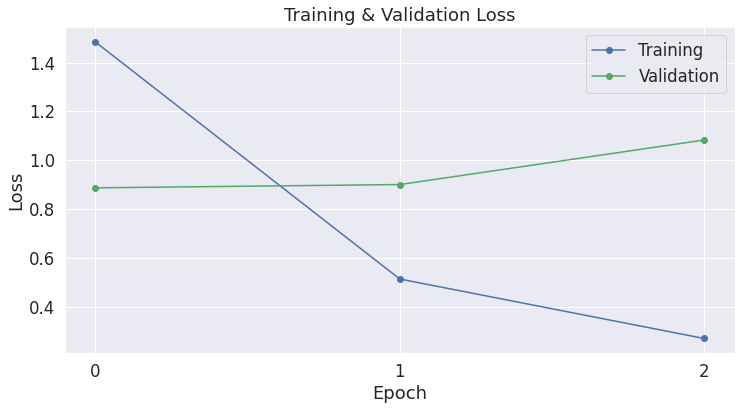

In [32]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.484000	, 0.514900,0.271800		], 'b-o', label="Training")
plt.plot([0.887569, 0.901105, 1.083094], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()

In [33]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


The following columns in the test set don't have a corresponding argument in `AlbertForQuestionAnswering.forward` and have been ignored: offset_mapping, id. If offset_mapping, id are not expected by `AlbertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 8742
  Batch size = 8


In [34]:
b

{'test_runtime': 145.6361,
 'test_samples_per_second': 60.026,
 'test_steps_per_second': 7.505}

In [35]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


{'exact_match': 60.62685884237017, 'f1': 70.43413042549093}